In [0]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON KERAS TUTORIALS (2019)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


# OBTAIN

In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# SCRUB

In [0]:
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255

# THE OLD ONE HOT ENCODE - CONVERT "CATEGORICAL" CLASSIFICATION TO ENCODE
# A "BINARIZATION" OF THE CATEGORIES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# MODEL

In [0]:
# BUILD BASELINE
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

In [0]:
# RUN BASELINE
model = baseline_model()

# FIT THE MODEL
history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/300





 - 4s - loss: 0.5222 - acc: 0.8570 - val_loss: 0.2381 - val_acc: 0.9323
Epoch 2/300
 - 3s - loss: 0.2010 - acc: 0.9439 - val_loss: 0.1645 - val_acc: 0.9527
Epoch 3/300
 - 3s - loss: 0.1454 - acc: 0.9591 - val_loss: 0.1331 - val_acc: 0.9596
Epoch 4/300
 - 3s - loss: 0.1122 - acc: 0.9687 - val_loss: 0.1090 - val_acc: 0.9674
Epoch 5/300
 - 3s - loss: 0.0916 - acc: 0.9743 - val_loss: 0.0952 - val_acc: 0.9723
Epoch 6/300
 - 3s - loss: 0.0740 - acc: 0.9798 - val_loss: 0.0843 - val_acc: 0.9751
Epoch 7/300
 - 3s - loss: 0.0617 - acc: 0.9832 - val_loss: 0.0810 - val_acc: 0.9748
Epoch 8/300
 - 3s - loss: 0.0525 - acc: 0.9861 - val_loss: 0.0750 - val_acc: 0.9779
Epoch 9/300
 - 3s - loss: 0.0438 - acc: 0.9888 - val_loss: 0.0722 - val_acc: 0.9783
Epoch 10/300
 - 3s - loss: 0.0372 - acc: 0.9908 - val_loss: 0.0659 - val_acc: 0.9795
Ep

# INTERPRET

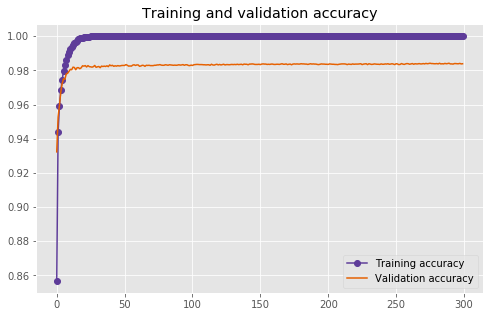

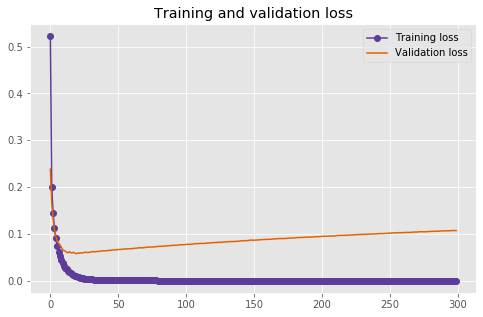

In [0]:
# PLOT THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)